In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Investigation

In [2]:
pd.set_option('display.max_columns', 50)
df = pd.read_csv('bike-shop.csv')
df

,Email,Ort,Hembesök/Verkstad,Markera önskade dagar [Måndag],Markera önskade dagar [Tisdag],Markera önskade dagar [Onsdag],Markera önskade dagar [Torsdag],Markera önskade dagar [Fredag],Antal cyklar,Typ av cykel,['Tidstämpel']
0,1,NaN,Hembesök,"FM, EM",FM,NaN,NaN,FM,1.0,Dam/herr,['2023-03-03 13.42.19']
1,2,Täby,Hembesök,EM,EM,EM,EM,EM,2.0,Dam/herr,['2023-03-11 12.59.57']
2,3,Danderyd,Hembesök,NaN,FM,FM,FM,FM,1.0,Lådcykel,['2023-03-17 09.37.11']
3,4,Vallentuna,Hembesök,"FM, EM","FM, EM","FM, EM","FM, EM","FM, EM",1.0,Dam/herr,['2023-03-18 10.26.34']
4,5,Danderyd,Hembesök,NaN,"FM, EM","FM, EM",NaN,NaN,5.0,"Dam/herr, Lådcykel, Barncykel, Elcykel",['2023-03-21 14.47.43']
...,...,...,...,...,...,...,...,...,...,...,...
161,155,Sollentuna,NaN,"FM, EM",NaN,NaN,NaN,NaN,1.0,Dam/herr,['2023-10-24 17.04.17']
162,156,Täby,NaN,NaN,NaN,EM,NaN,NaN,1.0,Elcykel,['2023-10-25 11.32.24']
163,157,Stockholm city,NaN,EM,NaN,EM,NaN,NaN,1.0,Dam/herr,['2023-11-12 12.48.20']
164,158,Täby,NaN,NaN,EM,NaN,NaN,NaN,1.0,Lådcykel,['2023-11-13 08.23.04']


In [3]:
df.dtypes

Email                                int64
Ort                                 object
Hembesök/Verkstad                   object
Markera önskade dagar [Måndag]      object
Markera önskade dagar [Tisdag]      object
Markera önskade dagar [Onsdag]      object
Markera önskade dagar [Torsdag]     object
Markera önskade dagar [Fredag]      object
Antal cyklar                       float64
Typ av cykel                        object
['Tidstämpel']                      object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Email                            166 non-null    int64  
 1   Ort                              165 non-null    object 
 2   Hembesök/Verkstad                23 non-null     object 
 3   Markera önskade dagar [Måndag]   89 non-null     object 
 4   Markera önskade dagar [Tisdag]   83 non-null     object 
 5   Markera önskade dagar [Onsdag]   99 non-null     object 
 6   Markera önskade dagar [Torsdag]  93 non-null     object 
 7   Markera önskade dagar [Fredag]   102 non-null    object 
 8   Antal cyklar                     165 non-null    float64
 9   Typ av cykel                     165 non-null    object 
 10  ['Tidstämpel']                   166 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 14.4+ KB


## Data Cleaning

### Rename Columns

In [5]:
column_mapping = {
    'Email' : 'ID',
    'Ort' : 'Place',
    'Hembesök/Verkstad' : 'Home or Workshop',
    'Markera önskade dagar [Måndag]': 'Monday',
    'Markera önskade dagar [Tisdag]': 'Tuesday',
    'Markera önskade dagar [Onsdag]': 'Wednesday',
    'Markera önskade dagar [Torsdag]': 'Thursday',
    'Markera önskade dagar [Fredag]': 'Friday',
    'Antal cyklar' : 'Bikes Num',
    'Typ av cykel' : 'Type',
    '[\'Tidstämpel\']' : 'Submitted at'
}

# Use the rename method to rename the columns
df.rename(columns=column_mapping, inplace=True)

In [6]:
df.head(3)

,ID,Place,Home or Workshop,Monday,Tuesday,Wednesday,Thursday,Friday,Bikes Num,Type,Submitted at
0,1,NaN,Hembesök,"FM, EM",FM,NaN,NaN,FM,1.0,Dam/herr,['2023-03-03 13.42.19']
1,2,Täby,Hembesök,EM,EM,EM,EM,EM,2.0,Dam/herr,['2023-03-11 12.59.57']
2,3,Danderyd,Hembesök,NaN,FM,FM,FM,FM,1.0,Lådcykel,['2023-03-17 09.37.11']


In [7]:
df.Monday.unique()

array(['FM, EM', 'EM', nan, 'FM'], dtype=object)

In [8]:
# Encode parts of the day
for column in df.columns:
    if column in ['Monday',	'Tuesday','Wednesday', 'Thursday', 'Friday']:
        df[column] = df[column].replace({'FM, EM': 2, 'FM': 0, 'EM': 1})

In [9]:
df.head(3)

,ID,Place,Home or Workshop,Monday,Tuesday,Wednesday,Thursday,Friday,Bikes Num,Type,Submitted at
0,1,NaN,Hembesök,2.0,0.0,NaN,NaN,0.0,1.0,Dam/herr,['2023-03-03 13.42.19']
1,2,Täby,Hembesök,1.0,1.0,1.0,1.0,1.0,2.0,Dam/herr,['2023-03-11 12.59.57']
2,3,Danderyd,Hembesök,NaN,0.0,0.0,0.0,0.0,1.0,Lådcykel,['2023-03-17 09.37.11']


### Home or Workshop

In [10]:
df['Home or Workshop'] = df['Home or Workshop'].replace({'Hembesök': 1, 'Verkstad': 0})

### Type

In [11]:
df.Type.unique()

array(['Dam/herr', 'Lådcykel', 'Dam/herr, Lådcykel, Barncykel, Elcykel',
       nan, 'MTB, hybrid', 'Elcykel', 'Barncykel', 'Dam/herr, Racer',
       'Dam/herr, MTB, hybrid', 'Dam/herr, Barncykel',
       'Dam/herr, Lådcykel, Barncykel', 'MTB, hybrid, Elcykel',
       'Lådcykel, Elcykel', 'Dam/herr, Lådcykel', 'Race/herr',
       'Dam/herr, MTB, Enduro/downhill', 'Urban arrow ', 'Elspark',
       'Dam/herr, Elspark', 'Ungdomscykel, 10-årig kille ',
       'Dam/herr, MTB, hybrid, Barncykel',
       'Dam/herr, MTB, hybrid, Barnvagn',
       'Dam/herr, Barn mountainbike Trek ', 'Racer',
       'MTB, Enduro/downhill', 'Dam/herr, Barnvagn', 'Elscooter',
       'MTB, hybrid, Barncykel, Elcykel', 'Dam/herr, Annan',
       'MTB, hybrid, Lådcykel, Elcykel', 'Annan'], dtype=object)

In [12]:
data = df.Type.unique()

# Use set to get unique values, filter out None values
unique_values = set(filter(lambda x: pd.notna(x), data))

# Split each item based on commas and flatten the list of unique names
unique_names = [name for item in unique_values for name in item.split(', ')]

unique_names = list(set(unique_names)) + ['No Type']
unique_names

['Elscooter',
 '10-årig kille ',
 'Race/herr',
 'MTB',
 'Racer',
 'Barn mountainbike Trek ',
 'Dam/herr',
 'Barnvagn',
 'hybrid',
 'Enduro/downhill',
 'Elcykel',
 'Elspark',
 'Urban arrow ',
 'Barncykel',
 'Annan',
 'Lådcykel',
 'Ungdomscykel',
 'No Type']

In [13]:
# Create one-hot encoded columns
for name in unique_names:
    df[name] = df['Type'].apply(lambda x: 1 if pd.notna(x) and name in x.split(', ') else 0)

# Handle 'No Type' corresponding to NaN values
df['No Type'] = df['Type'].apply(lambda x: 1 if pd.isna(x) else 0)


In [14]:
df.head()

,ID,Place,Home or Workshop,Monday,Tuesday,Wednesday,Thursday,Friday,Bikes Num,Type,Submitted at,Elscooter,10-årig kille,Race/herr,MTB,Racer,Barn mountainbike Trek,Dam/herr,Barnvagn,hybrid,Enduro/downhill,Elcykel,Elspark,Urban arrow,Barncykel,Annan,Lådcykel,Ungdomscykel,No Type
0,1,NaN,1.0,2.0,0.0,NaN,NaN,0.0,1.0,Dam/herr,['2023-03-03 13.42.19'],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,Täby,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Dam/herr,['2023-03-11 12.59.57'],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,Danderyd,1.0,NaN,0.0,0.0,0.0,0.0,1.0,Lådcykel,['2023-03-17 09.37.11'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Vallentuna,1.0,2.0,2.0,2.0,2.0,2.0,1.0,Dam/herr,['2023-03-18 10.26.34'],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,Danderyd,1.0,NaN,2.0,2.0,NaN,NaN,5.0,"Dam/herr, Lådcykel, Barncykel, Elcykel",['2023-03-21 14.47.43'],0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0


### Place

In [15]:
df.Place.unique()

array([nan, 'Täby', 'Danderyd', 'Vallentuna', 'täby', 'Sollentuna',
       'Vaxholm', 'Åkersberga', 'Annan', 'Stockholm city'], dtype=object)

In [16]:
df['Place'] = df['Place'].replace({'täby': 'Täby', np.nan: 'Not Specified'})

In [17]:
df.Place.unique()

array(['Not Specified', 'Täby', 'Danderyd', 'Vallentuna', 'Sollentuna',
       'Vaxholm', 'Åkersberga', 'Annan', 'Stockholm city'], dtype=object)

## Date and Time

In [18]:
df.head()

,ID,Place,Home or Workshop,Monday,Tuesday,Wednesday,Thursday,Friday,Bikes Num,Type,Submitted at,Elscooter,10-årig kille,Race/herr,MTB,Racer,Barn mountainbike Trek,Dam/herr,Barnvagn,hybrid,Enduro/downhill,Elcykel,Elspark,Urban arrow,Barncykel,Annan,Lådcykel,Ungdomscykel,No Type
0,1,Not Specified,1.0,2.0,0.0,NaN,NaN,0.0,1.0,Dam/herr,['2023-03-03 13.42.19'],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,Täby,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Dam/herr,['2023-03-11 12.59.57'],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,Danderyd,1.0,NaN,0.0,0.0,0.0,0.0,1.0,Lådcykel,['2023-03-17 09.37.11'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Vallentuna,1.0,2.0,2.0,2.0,2.0,2.0,1.0,Dam/herr,['2023-03-18 10.26.34'],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,Danderyd,1.0,NaN,2.0,2.0,NaN,NaN,5.0,"Dam/herr, Lådcykel, Barncykel, Elcykel",['2023-03-21 14.47.43'],0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0


In [19]:
# Remove square brackets
df['Submitted at'] = df['Submitted at'].str.strip("[]'")

# Apply the custom parser
date_time = pd.to_datetime(df['Submitted at'], format='%Y-%m-%d %H.%M.%S')

# Extract date and time components into separate columns
df['Submission Date'] = date_time.dt.date
df['Submission Time'] = date_time.dt.time

# Convert to datetime
df['Submission Date'] = pd.to_datetime(df['Submission Date'])
df['Submission Time'] = pd.to_timedelta(df['Submission Time'].astype(str))


In [20]:
# Drop the original 'Submitted at' column if needed
df = df.drop(columns=['Submitted at', 'Type', 'Home or Workshop'])

In [21]:
df

,ID,Place,Monday,Tuesday,Wednesday,Thursday,Friday,Bikes Num,Elscooter,10-årig kille,Race/herr,MTB,Racer,Barn mountainbike Trek,Dam/herr,Barnvagn,hybrid,Enduro/downhill,Elcykel,Elspark,Urban arrow,Barncykel,Annan,Lådcykel,Ungdomscykel,No Type,Submission Date,Submission Time
0,1,Not Specified,2.0,0.0,NaN,NaN,0.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2023-03-03,0 days 13:42:19
1,2,Täby,1.0,1.0,1.0,1.0,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2023-03-11,0 days 12:59:57
2,3,Danderyd,NaN,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2023-03-17,0 days 09:37:11
3,4,Vallentuna,2.0,2.0,2.0,2.0,2.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2023-03-18,0 days 10:26:34
4,5,Danderyd,NaN,2.0,2.0,NaN,NaN,5.0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,2023-03-21,0 days 14:47:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,155,Sollentuna,2.0,NaN,NaN,NaN,NaN,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2023-10-24,0 days 17:04:17
162,156,Täby,NaN,NaN,1.0,NaN,NaN,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2023-10-25,0 days 11:32:24
163,157,Stockholm city,1.0,NaN,1.0,NaN,NaN,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2023-11-12,0 days 12:48:20
164,158,Täby,NaN,1.0,NaN,NaN,NaN,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2023-11-13,0 days 08:23:04


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   ID                       166 non-null    int64          
 1   Place                    166 non-null    object         
 2   Monday                   89 non-null     float64        
 3   Tuesday                  83 non-null     float64        
 4   Wednesday                99 non-null     float64        
 5   Thursday                 93 non-null     float64        
 6   Friday                   102 non-null    float64        
 7   Bikes Num                165 non-null    float64        
 8   Elscooter                166 non-null    int64          
 9   10-årig kille            166 non-null    int64          
 10  Race/herr                166 non-null    int64          
 11  MTB                      166 non-null    int64          
 12  Racer                 

## Visualisation

In [23]:
sns.set_theme(style="darkgrid")
sns.despine()

<Figure size 640x480 with 0 Axes>

In [24]:
df['Place'].value_counts()

Place
Täby              95
Danderyd          48
Vallentuna         7
Annan              6
Sollentuna         3
Åkersberga         3
Stockholm city     2
Not Specified      1
Vaxholm            1
Name: count, dtype: int64

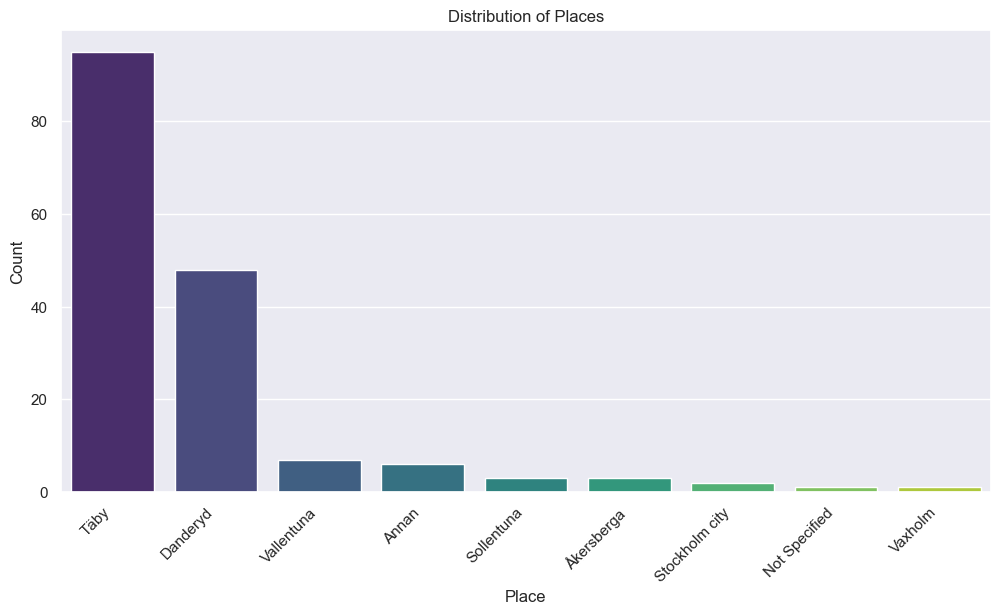

In [25]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='Place', data=df, order=df['Place'].value_counts().index, palette='viridis')
plt.title('Distribution of Places')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

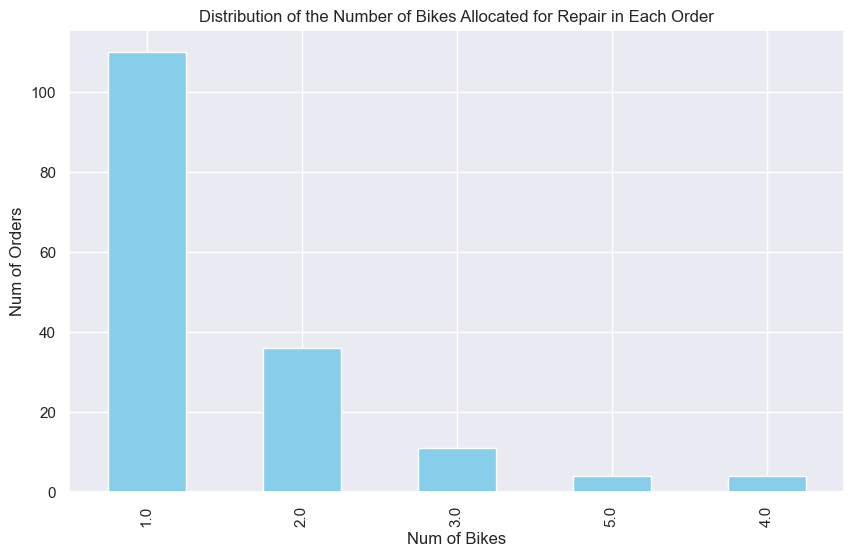

In [26]:
plt.figure(figsize=(10, 6))
df['Bikes Num'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of the Number of Bikes Allocated for Repair in Each Order')
plt.xlabel('Num of Bikes')
plt.ylabel('Num of Orders')
plt.show()

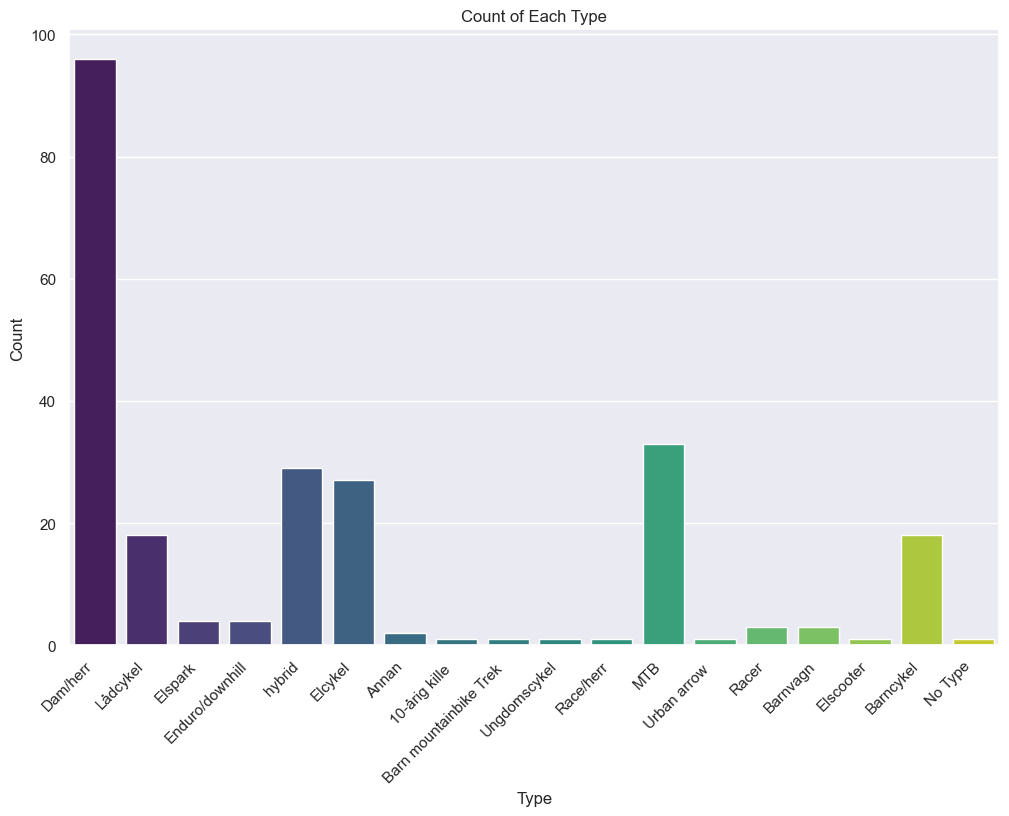

In [27]:
# Assuming your DataFrame is named df
plt.figure(figsize=(12, 8))

type_columns = ['Dam/herr', 'Lådcykel', 'Elspark', 'Enduro/downhill', 'hybrid', 'Elcykel', 'Annan', '10-årig kille ',
                'Barn mountainbike Trek ', 'Ungdomscykel', 'Race/herr', 'MTB', 'Urban arrow ', 'Racer', 'Barnvagn',
                'Elscooter', 'Barncykel', 'No Type']

# Subset the DataFrame to include only the type columns
types_df = df[type_columns]

# Filter the DataFrame to include only rows where the value is 1
types_df_one = types_df[types_df == 1]

# Melt the DataFrame for easier plotting
melted_df = types_df_one.melt(var_name='Type', value_name='Count').dropna()

# Create a count plot
sns.countplot(x='Type', data=melted_df, palette='viridis', )

plt.title('Count of Each Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [41]:
types = df[['Dam/herr', 'Lådcykel', 'Elspark', 'Enduro/downhill', 'hybrid', 'Elcykel', 'Annan', '10-årig kille ',
                'Barn mountainbike Trek ', 'Ungdomscykel', 'Race/herr', 'MTB', 'Urban arrow ', 'Racer', 'Barnvagn',
                'Elscooter', 'Barncykel', 'No Type']]

types

,Dam/herr,Lådcykel,Elspark,Enduro/downhill,hybrid,Elcykel,Annan,10-årig kille,Barn mountainbike Trek,Ungdomscykel,Race/herr,MTB,Urban arrow,Racer,Barnvagn,Elscooter,Barncykel,No Type
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
163,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
164,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


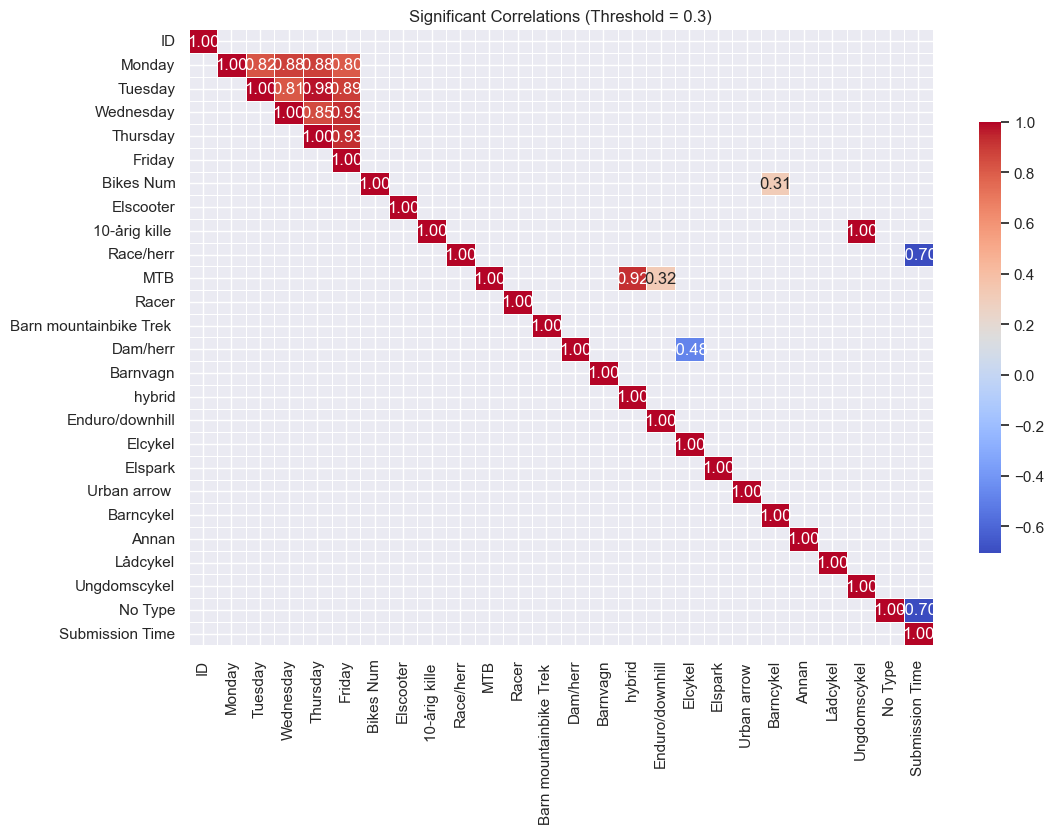

In [29]:
# Assuming your DataFrame is named df
# Extract numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the threshold for significance
significant_corr_mask = np.abs(correlation_matrix) > 0.3

# Combine the upper triangle mask and the significance mask
final_mask = np.logical_and(mask, significant_corr_mask)

# Set values outside the final mask to NaN
correlation_matrix[~final_mask] = np.nan

# Plot heatmap for significant correlations with unique values
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={"shrink": 0.7})
plt.title('Significant Correlations (Threshold = 0.3)')
plt.show()


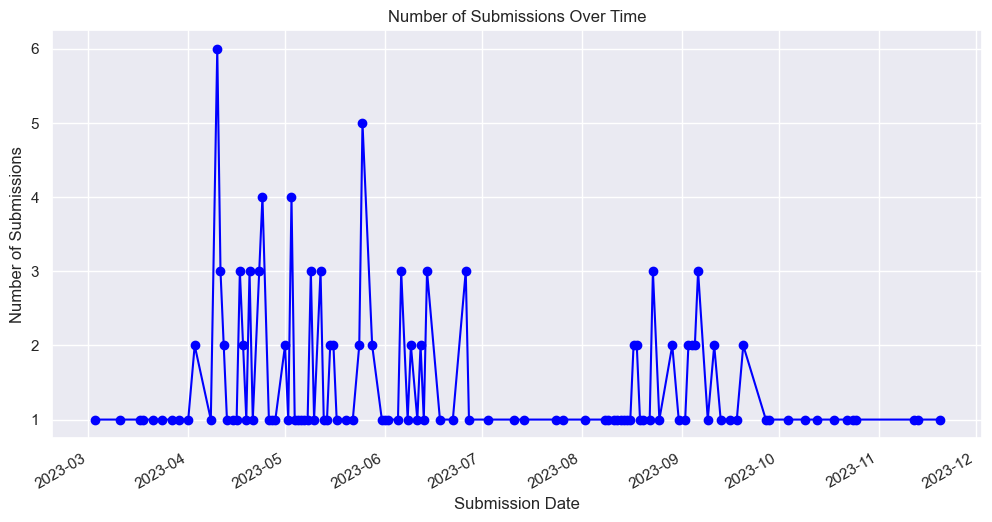

In [30]:
# Convert 'Submission Date' to datetime
df['Submission Date'] = pd.to_datetime(df['Submission Date'])

# Group by 'Submission Date' and count the number of submissions
submissions_over_time = df.groupby('Submission Date').size()

# Plot the number of submissions over time
plt.figure(figsize=(12, 6))
submissions_over_time.plot(kind='line', marker='o', color='blue')
plt.title('Number of Submissions Over Time')
plt.xlabel('Submission Date')
plt.ylabel('Number of Submissions')
plt.grid(True)
plt.show()


In [31]:
df

,ID,Place,Monday,Tuesday,Wednesday,Thursday,Friday,Bikes Num,Elscooter,10-årig kille,Race/herr,MTB,Racer,Barn mountainbike Trek,Dam/herr,Barnvagn,hybrid,Enduro/downhill,Elcykel,Elspark,Urban arrow,Barncykel,Annan,Lådcykel,Ungdomscykel,No Type,Submission Date,Submission Time
0,1,Not Specified,2.0,0.0,NaN,NaN,0.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2023-03-03,0 days 13:42:19
1,2,Täby,1.0,1.0,1.0,1.0,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2023-03-11,0 days 12:59:57
2,3,Danderyd,NaN,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2023-03-17,0 days 09:37:11
3,4,Vallentuna,2.0,2.0,2.0,2.0,2.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2023-03-18,0 days 10:26:34
4,5,Danderyd,NaN,2.0,2.0,NaN,NaN,5.0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,2023-03-21,0 days 14:47:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,155,Sollentuna,2.0,NaN,NaN,NaN,NaN,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2023-10-24,0 days 17:04:17
162,156,Täby,NaN,NaN,1.0,NaN,NaN,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2023-10-25,0 days 11:32:24
163,157,Stockholm city,1.0,NaN,1.0,NaN,NaN,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2023-11-12,0 days 12:48:20
164,158,Täby,NaN,1.0,NaN,NaN,NaN,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2023-11-13,0 days 08:23:04


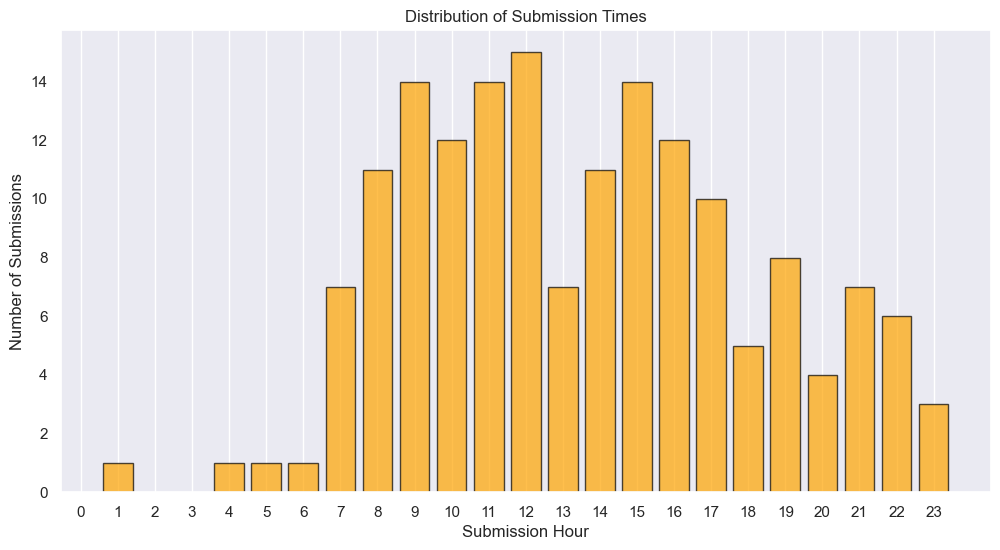

In [32]:
# Extract hours from 'Submission Time'
df['Submission Hour'] = df['Submission Time'].dt.components['hours']

# Plot the histogram of submission times
plt.figure(figsize=(12, 6))
from collections import Counter
cntr = Counter(df['Submission Hour'])
plt.bar(cntr.keys(),cntr.values(), color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Submission Times')
plt.xlabel('Submission Hour')
plt.ylabel('Number of Submissions')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()


## Returning Customers Analysis



In [33]:
returned = df.ID.value_counts()[:7].index.to_list()
# IDs of those who returned 
returned

[37, 59, 6, 48, 115, 10, 98]

In [34]:
returning_customers = df[df['ID'].isin(returned)]
returning_customers

,ID,Place,Monday,Tuesday,Wednesday,Thursday,Friday,Bikes Num,Elscooter,10-årig kille,Race/herr,MTB,Racer,Barn mountainbike Trek,Dam/herr,Barnvagn,hybrid,Enduro/downhill,Elcykel,Elspark,Urban arrow,Barncykel,Annan,Lådcykel,Ungdomscykel,No Type,Submission Date,Submission Time,Submission Hour
5,6,Danderyd,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2023-03-24,0 days 05:53:37,5.0
9,10,Täby,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaT,NaT,NaN
36,37,Danderyd,NaN,NaN,NaN,2.0,NaN,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2023-04-21,0 days 14:48:26,14.0
43,10,Täby,NaN,NaN,NaN,NaN,NaN,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT,NaT,NaN
48,48,Danderyd,2.0,2.0,2.0,2.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2023-05-01,0 days 15:04:52,15.0
59,59,Danderyd,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2023-05-08,0 days 10:16:14,10.0
66,59,Danderyd,2.0,2.0,2.0,2.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2023-05-12,0 days 16:53:34,16.0
99,98,Täby,NaN,NaN,2.0,NaN,NaN,1.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2023-06-14,0 days 08:19:20,8.0
105,37,Danderyd,NaN,NaN,NaN,2.0,NaN,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2023-06-26,0 days 19:46:29,19.0
117,115,Danderyd,NaN,0.0,NaN,NaN,NaN,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2023-08-12,0 days 09:12:13,9.0


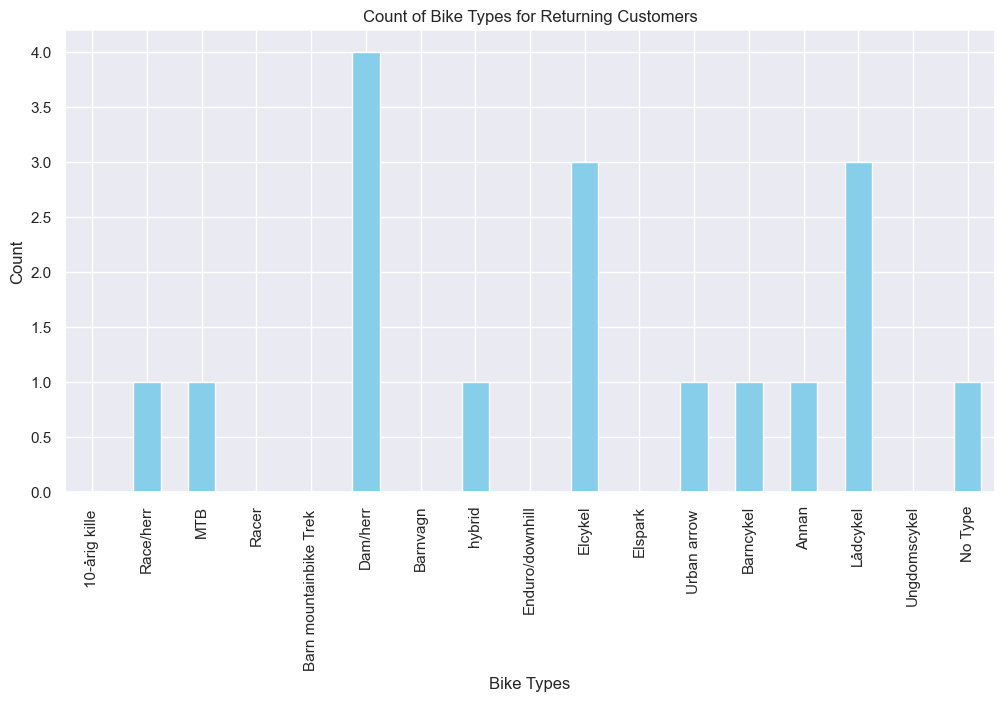

In [35]:
plt.figure(figsize=(12, 6))
bike_types = df.columns[9:26]  # columns represent different bike types
returning_customers[bike_types].sum().plot(kind='bar', color='skyblue')
plt.title('Count of Bike Types for Returning Customers')
plt.xlabel('Bike Types')
plt.ylabel('Count')
plt.show()


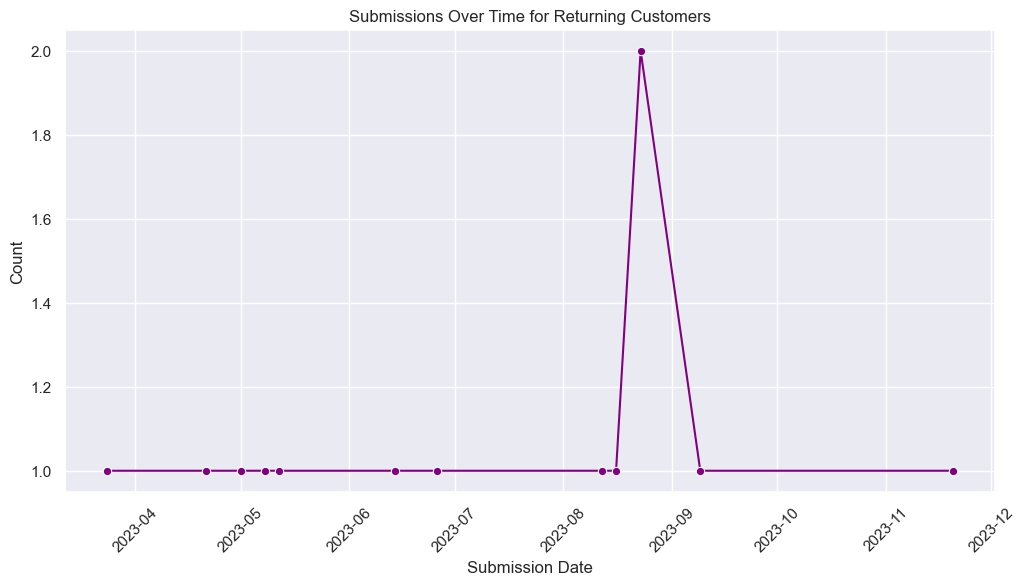

In [36]:
returned_by_date = returning_customers.sort_values(by='Submission Date')[:-2]

plt.figure(figsize=(12, 6))
sns.lineplot(data=returned_by_date.groupby('Submission Date').size(), marker='o', color='purple')
plt.title('Submissions Over Time for Returning Customers')
plt.xlabel('Submission Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

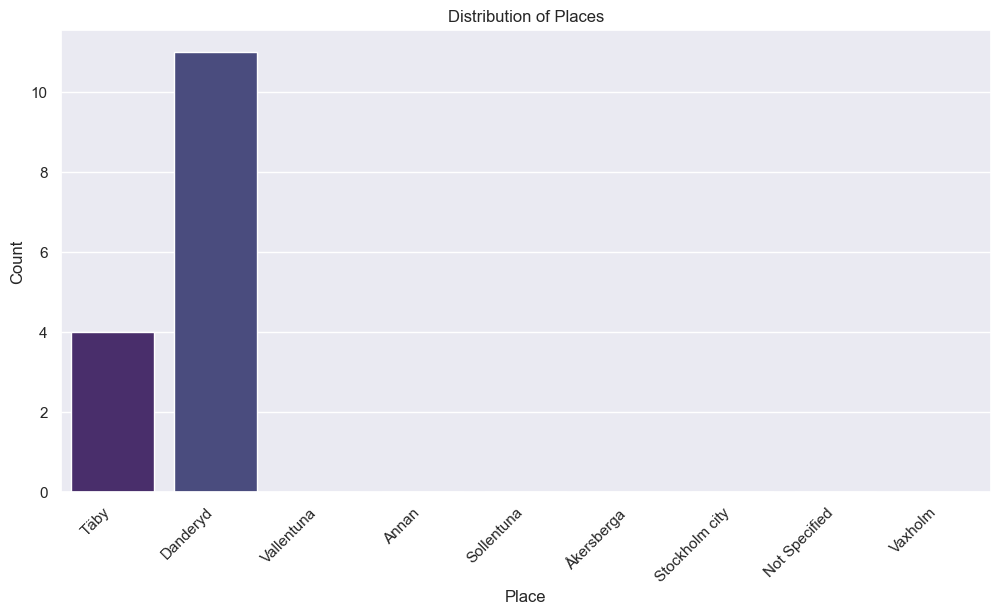

In [37]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='Place', data=returning_customers, order=df['Place'].value_counts().index, palette='viridis')
plt.title('Distribution of Places')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()